<a href="https://colab.research.google.com/github/Ayush-hm/AI-Toolbox/blob/main/Time_Series_Forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Time Series Exploratory Data Analysis

**Time Series Preprocessing Techniques**


*   Stationarity
*   Differencing


*   Moving Average
*   Exponential Moving Average
*   Missing Values Imputation
*   Outlier Detection and Removal
*   Scaling
*   Normalization

In [ ]:
import kagglehub
path = kagglehub.dataset_download("rakannimer/air-passengers")

Using Colab cache for faster access to the 'air-passengers' dataset.


In [ ]:
import pandas as pd
import os
path = os.path.join(path, "AirPassengers.csv")
data = pd.read_csv(path,header=0, index_col=0)

In [ ]:
data.head()

,#Passengers
Month,
1949-01,112
1949-02,118
1949-03,132
1949-04,129
1949-05,121


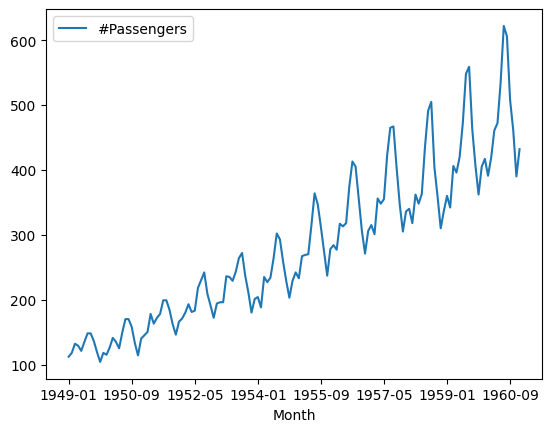

In [ ]:
import matplotlib.pyplot as plt
data.plot()
plt.show()

In [ ]:
values = data.values
parts=int(len(values)/3)
part1,part2,part3=values[0:parts],values[parts:parts*2],values[parts*2:parts*3]
mean1,mean2,mean3=part1.mean(),part2.mean(),part3.mean()
var1,var2, var3=part1.var(),part2.var(),part3.var()

In [ ]:
print(mean1,var1)
print(mean2,var2)
print(mean3,var3)

158.375 1071.859375
269.0416666666667 3041.289930555555
413.4791666666667 6033.624565972222


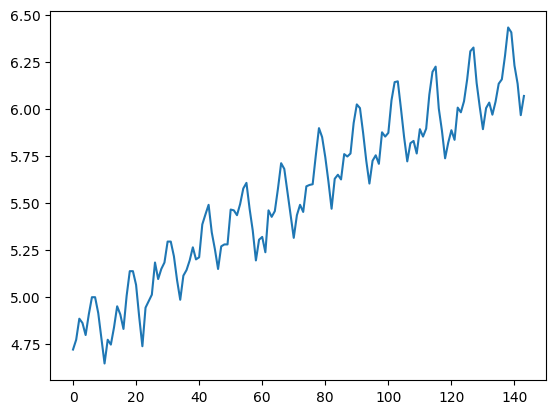

In [ ]:
import numpy as np
log_value=np.log(data.values)
plt.plot(log_value)
plt.show()

In [ ]:
parts=int(len(log_value)/3)
part1,part2,part3=log_value[0:parts],log_value[parts:parts*2],log_value[parts*2:parts*3]
mean1,mean2,mean3=part1.mean(),part2.mean(),part3.mean()
var1,var2, var3=part1.var(),part2.var(),part3.var()

In [ ]:
print(mean1,var1)
print(mean2,var2)
print(mean3,var3)

5.0439107377437 0.04200734413151691
5.574732792583696 0.039667599364687674
6.007884345268219 0.032703822155686


**Augmented Dickey-Fuller Test**

Statistical test that is built to test whether univariate time series data is stationary or not.

This test is based on a hypothesis and can tell us the degree of probability to which it can be accepted.

It determines how strongly, a univariate time series data follows a trend.

    Ho (Null Hypothesis): Time series data is non-stationary
    H1 (alternate Hypothesis): Time series data is stationary



In [ ]:
from statsmodels.tsa.stattools import adfuller
result=adfuller(values)
print('Augmented Dickey-Fuller Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
  print('\t%s: %.3f' % (key, value))

Augmented Dickey-Fuller Statistic: 0.815369
p-value: 0.991880
Critical Values:
	1%: -3.482
	5%: -2.884
	10%: -2.579


**Seasonal Adjustment**

Seasonal adjustment is a statistical technique used to remove the effects of regular, repeating patterns (seasonal variations) from a time series dataset.

Key steps in seasonal adjustment include:

* **Identifying Seasonal Patterns**:
        Analyze the time series to identify repeating patterns that occur at regular intervals. These patterns may be related to seasons, holidays, or other periodic events.
* **Decomposition**:
        Decompose the time series into its different components, typically separating it into trend, seasonal, and residual (error) components. The trend represents the long-term movement, the seasonal component captures the repeating patterns, and the residual component includes the irregular fluctuations.
* **Adjustment**:
        Adjust the time series by removing or smoothing out the seasonal component.



# Time Series Decomposition

It brings the time series into its components: Trend, Seasonality & Residual

    Addititve Decomposition: y(t) = Trend + Seasonality + Residual

    Multiplicative Decomposition: y(t) = Trend * Seasonality * Residual

    

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose, STL
from statsmodels.tsa.stattools import adfuller
data.head()

,#Passengers
Month,
1949-01,112
1949-02,118
1949-03,132
1949-04,129
1949-05,121


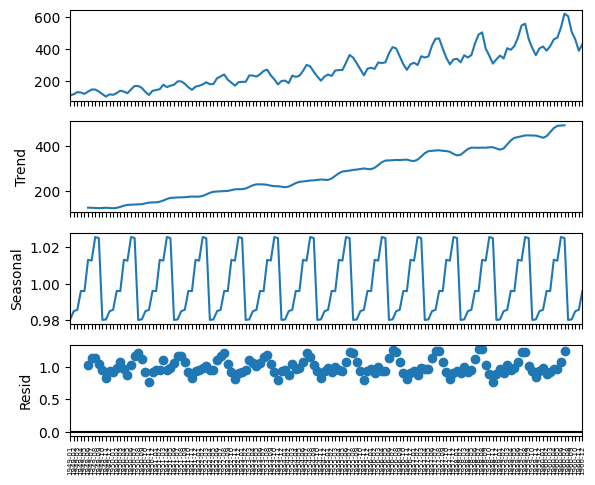

In [ ]:
# Multiplicative Decomposition
multiplicative_decompose = seasonal_decompose(data, model='multiplicative', period=10)
multiplicative_decompose.plot()
plt.xticks(rotation=90, fontsize=5)
plt.show()

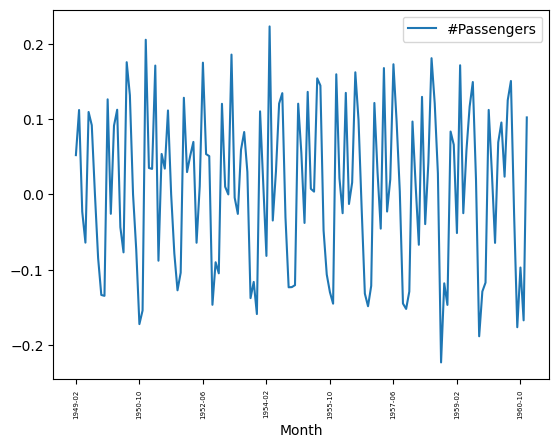

In [ ]:
log_ts=np.log(data)
diff_ts=log_ts.diff().dropna()
diff_ts.head()
diff_ts.plot()
plt.xticks(rotation=90, fontsize=5)
plt.show()

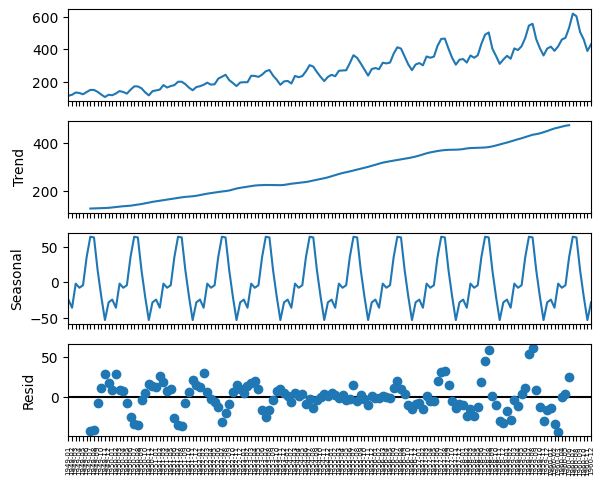

In [ ]:
# Additive Decomposition
additive_decompose = seasonal_decompose(data, model='additive', period=12)
additive_decompose.plot()
plt.xticks(rotation=90, fontsize=5)
plt.show()

### Comparing Additive and STL Decomposition of `diff_ts`

Additive Decomposition of diff_ts:


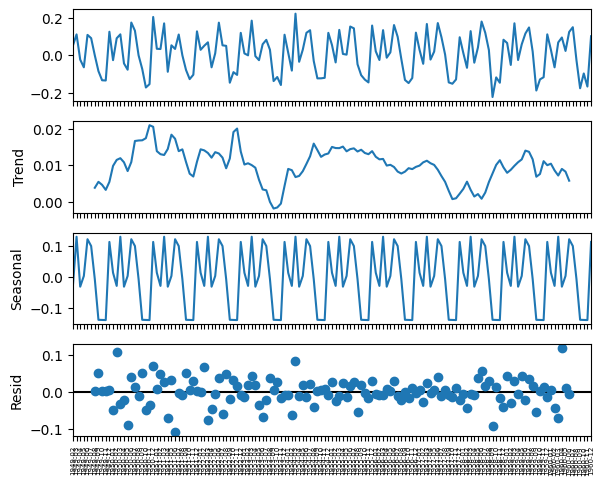

In [ ]:
# Additive Decomposition plot for comparison
print("Additive Decomposition of diff_ts:")
additive_decompose = seasonal_decompose(diff_ts, model='additive', period=12)
additive_decompose.plot()
plt.xticks(rotation=90, fontsize=5)
plt.show()

STL Decomposition of diff_ts:


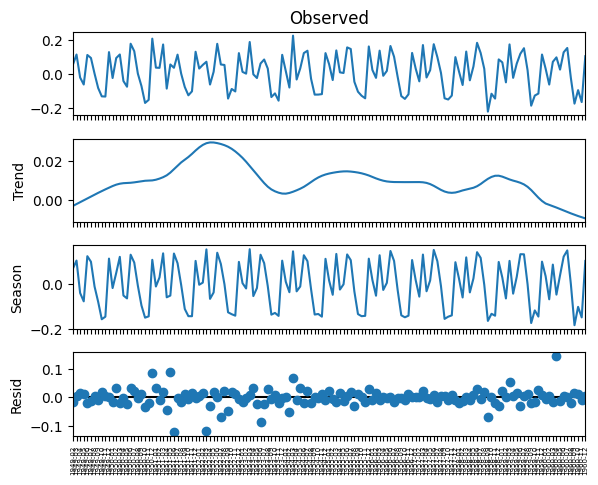

In [ ]:
# STL Decomposition plot for comparison
print("STL Decomposition of diff_ts:")
stl=STL(diff_ts,period=12,robust=True)
res=stl.fit()
res.plot()
plt.xticks(rotation=90, fontsize=5)
plt.show()

#### Key Differences:

*   **Robustness to Outliers**: STL (Seasonal-Trend decomposition using Loess) is generally more robust to outliers than traditional additive decomposition. This is because STL uses a locally weighted regression (Loess) for estimating the trend and seasonal components, which is less sensitive to extreme values.

*   **Handling of Seasonality**: While both methods aim to extract seasonality, STL allows for the seasonal component to vary over time (i.e., it can be non-constant seasonality). Standard additive decomposition often assumes a constant seasonal component.

*   **Trend Estimation**: STL uses Loess for trend estimation, which can capture more complex, non-linear trends. The trend in standard additive decomposition might be estimated using simpler moving averages, which can sometimes be less flexible.

*   **Residuals**: The residuals from STL decomposition are often cleaner and more representative of the 'noise' in the series due to its robust nature, whereas residuals from additive decomposition might still contain some residual structure if the assumptions of constant seasonality or linear trend are violated. In this specific case, the `diff_ts` series already had its trend removed by differencing, and the plots show how both methods further decompose it.

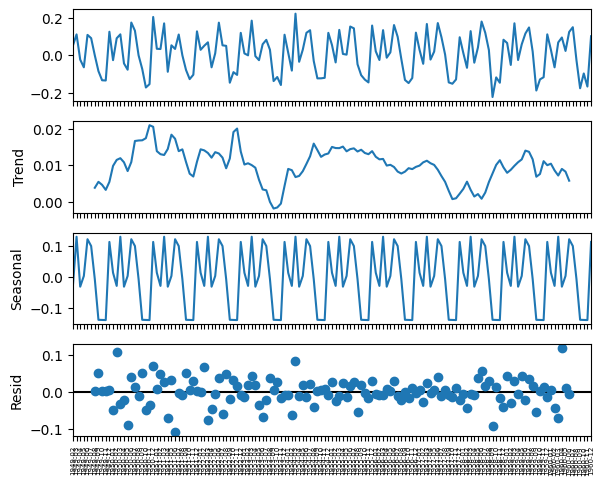

In [ ]:
# Additive Decomposition
additive_decompose = seasonal_decompose(diff_ts, model='additive', period=12)
additive_decompose.plot()
plt.xticks(rotation=90, fontsize=5)
plt.show()

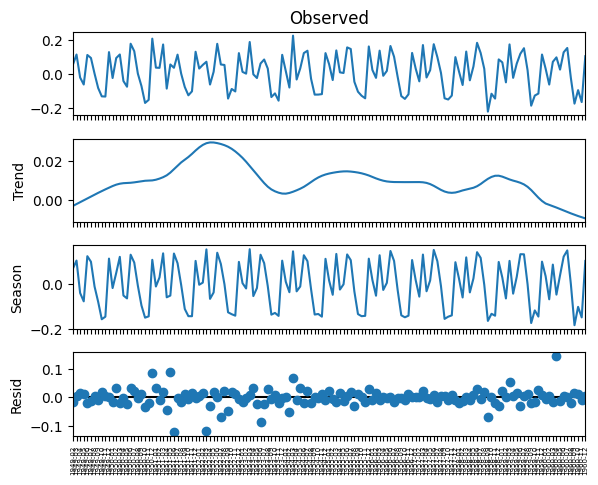

In [ ]:
#stl decomposition
stl=STL(diff_ts,period=12,robust=True)
res=stl.fit()
res.plot()
plt.xticks(rotation=90, fontsize=5)
plt.show()